<a href="https://colab.research.google.com/github/FacuNieto/Argentina_Programa_4.0/blob/master/Demo_Practica_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

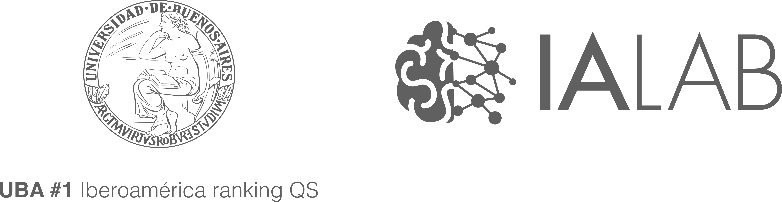

# 1 Juguete no tan juguete

Una pequeña farmacéutica produce una nueva y exitosa medicación cuya composición se basa principalmente en componentes de origen vegetal. 
Debido al aumento de ventas de este medicamento el fabricante decide mejorar el proceso para que sea más rápido y eficiente maximizando el volumen de fabricación. El área de procesos determinó que uno de los cuellos de botella se encuentra en la clasificación humana de los componentes vegetales debido a que las plantas utilizadas tienen características visuales muy similares, y deben ser clasificadas por un empleado experimentado.

Los componentes vegetales consisten de 3 tipos de flores diferentes:

El área de investigación y desarrollo desarrolló un sistema de visión artificial capaz de calcular:


*  El largo y el ancho del pétalo.
*  El largo y el ancho del sépalo.





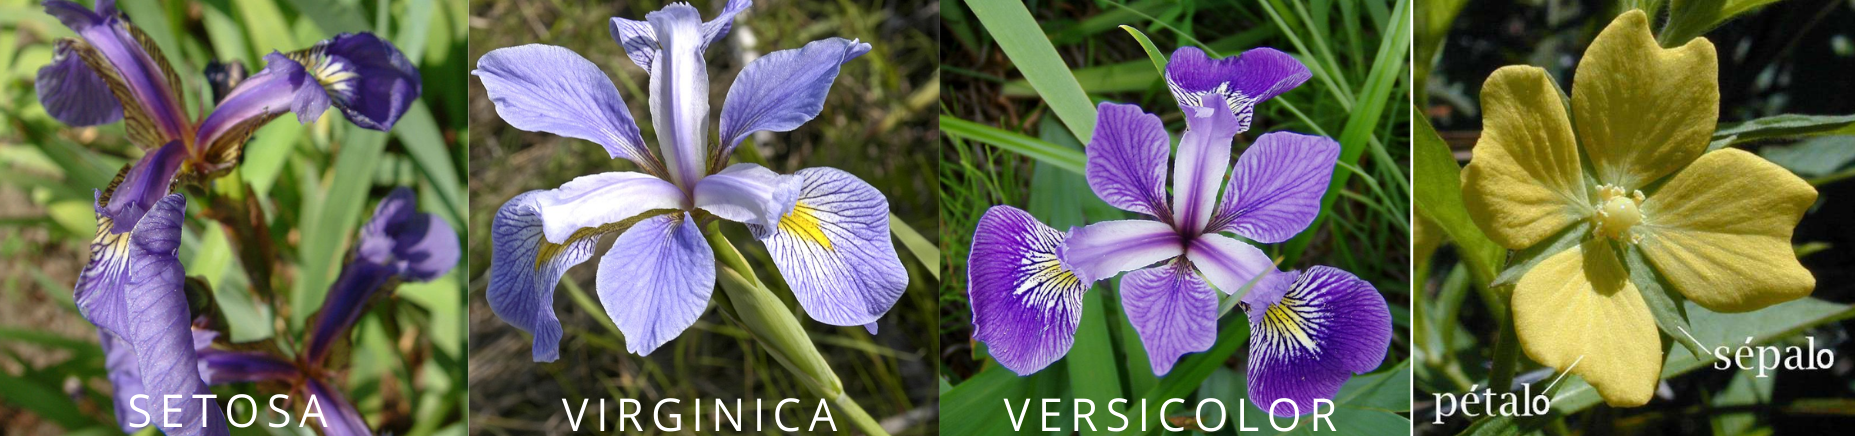

## 1.1 Carga de librerías

In [ ]:
#importamos librerias numpy, pandas y matplotlib 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#importamos base de datos
from sklearn.datasets import load_iris

#importamos algoritmo arbol de decision y la herramienta para plotear el arbol
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report

## 1.2 Carga, analisis y visualización de dataset.

In [ ]:
#cargamos el dataset
iris = load_iris()

In [ ]:
display(iris['target_names'])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#cargamos el modelo
clf = DecisionTreeClassifier()

In [ ]:
#Visualizamos en un dataframe
iris_df= pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Concatenamos la informacion de data con target
iris_df_c=pd.DataFrame(data= np.c_[iris.data , iris.target], columns= iris['feature_names'] + ['target'])
display(iris_df_c)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris_df_c.info() # verificar nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


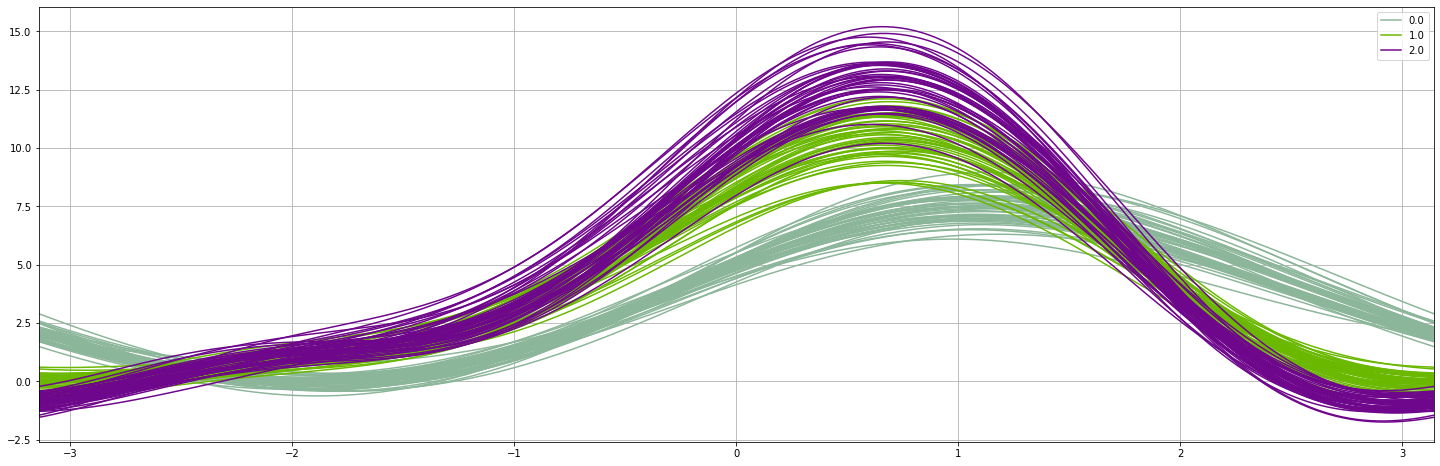

In [ ]:
#Generamos un andrews plot
fig = plt.figure(figsize = (25, 8))
pd.plotting.andrews_curves(iris_df_c,'target')
plt.show()

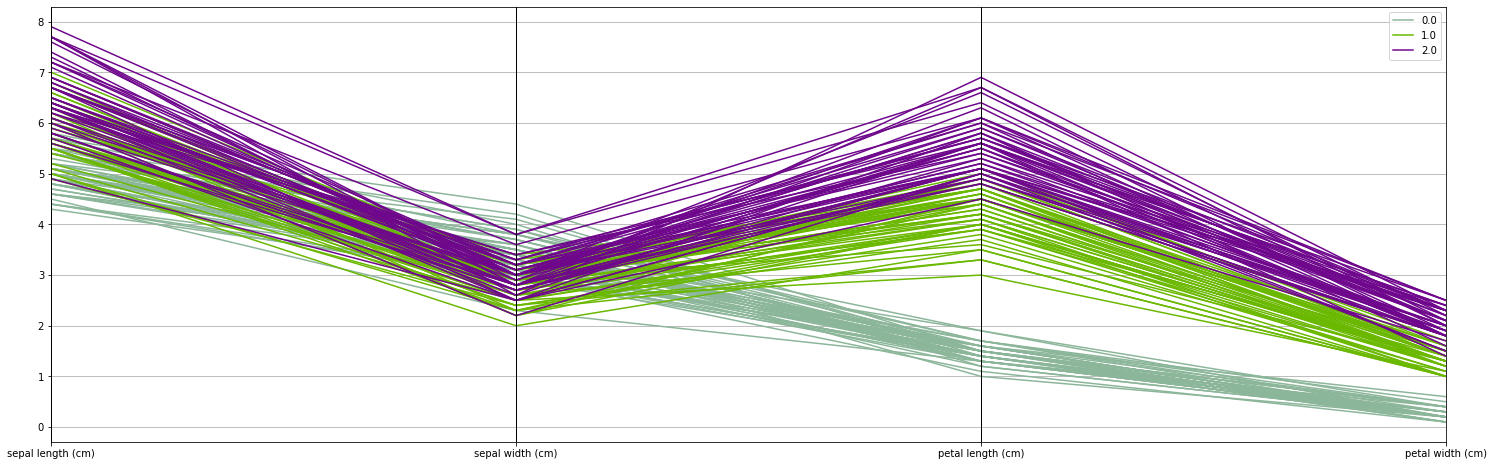

In [ ]:
#Generamos un grafico de coordenadas paralelas.
fig = plt.figure(figsize = (25, 8))
pd.plotting.parallel_coordinates(iris_df_c,'target')
plt.show()

## 1.3 Generación de datos de entrenamiento y prueba

In [ ]:
#dividiremos el dataset en datos de entrenamiento y de prueba

x= iris_df_c.drop('target', axis = 1)
y= iris_df_c['target']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=14)

## 1.4 Carga y entrenamiento de modelo 

In [ ]:
# Entrenamos:
clf = DecisionTreeClassifier().fit(x_train, y_train)

# Hacemos la prediccion:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision= ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.9736842105263158
precision=  0.9761904761904763


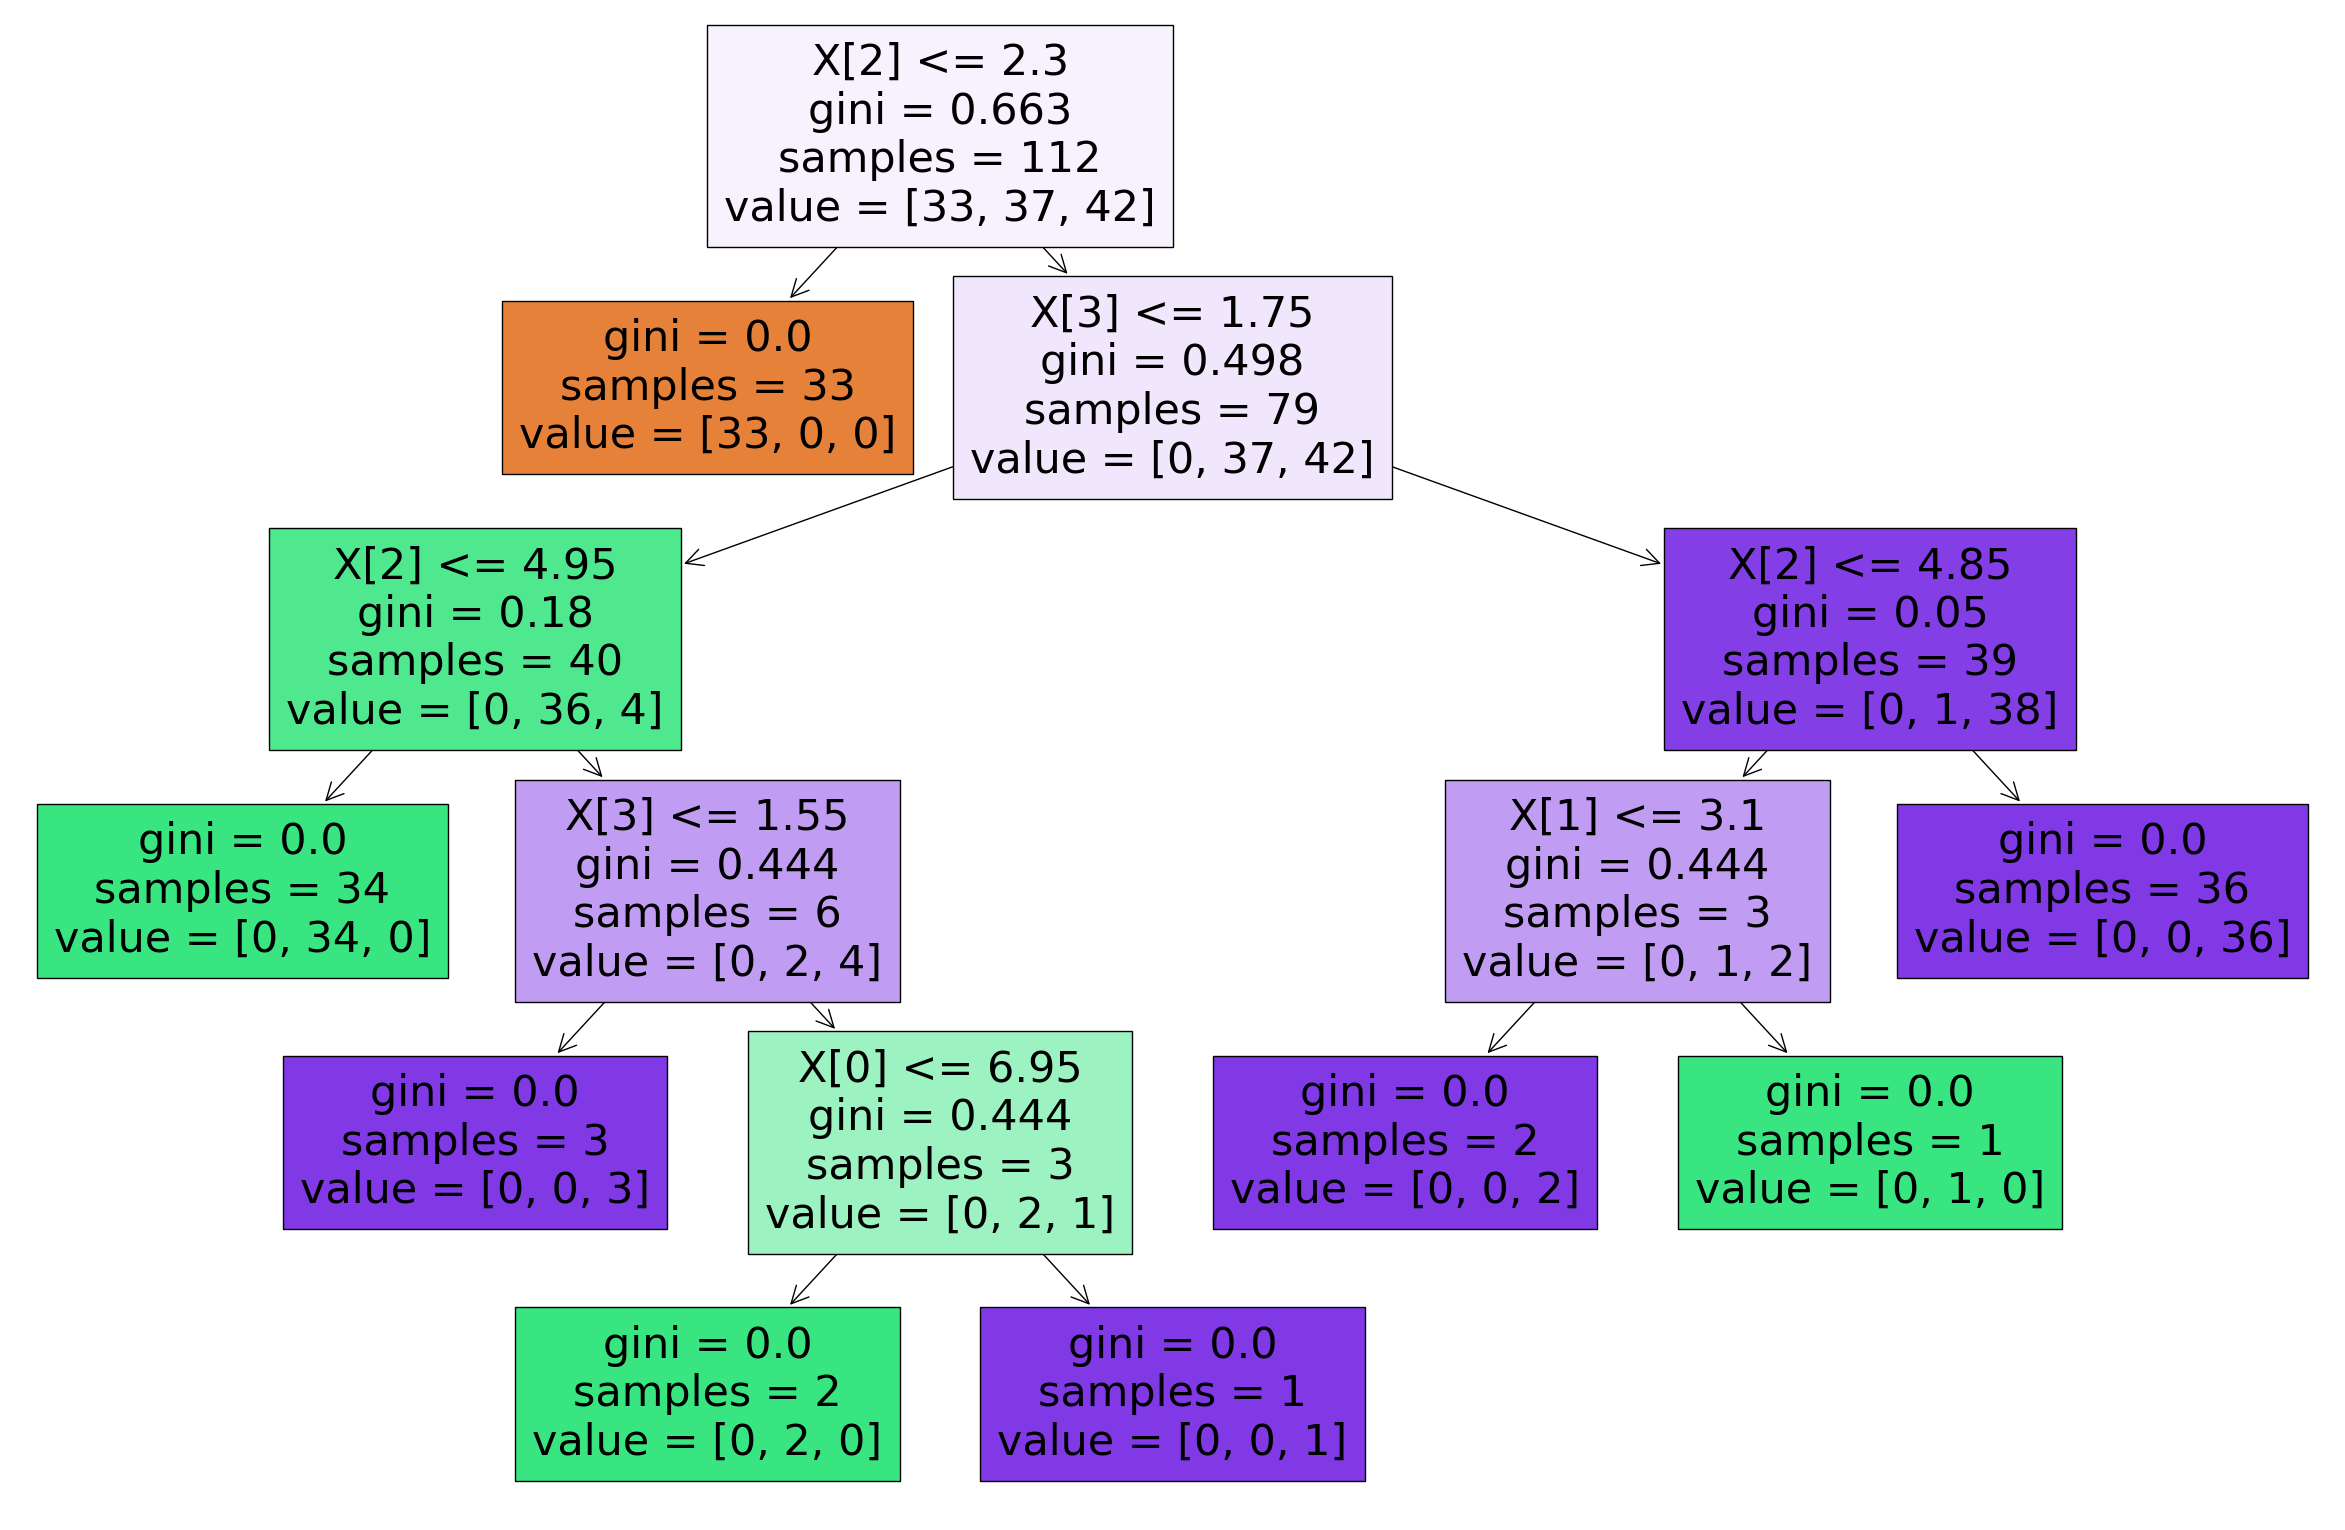

In [ ]:
# Graficamos Arbol de decision.
plt.rcParams["figure.dpi"] = 500
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True,)
plt.savefig('arbol.png')
plt.show()

In [ ]:
#Metricas varias
print(classification_report(y_test, y_pred, target_names=iris.target_names))
plt.show()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      1.00      0.89        12
   virginica       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



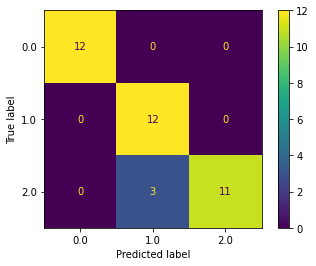

In [ ]:
#Realizamos la matriz de confusion.
matriz=confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=clf.classes_)
disp.plot() 
plt.show()

# 2 Ejemplo academico

# 3 Furvoooooooooo

In [10]:
!git clone https://github.com/FacuNieto/Argentina_Programa_4.0.git

Cloning into 'Argentina_Programa_4.0'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris dataset iris
